In [28]:
%load_ext nbtutor

The nbtutor extension is already loaded. To reload it, use:
  %reload_ext nbtutor


# APP1 — Amphi 4

## Vos questions

Que doit afficher le programme ASCII quand un caractère n'existe pas dans la police ?  
*On peut mettre un blanc, un caractère spécial...*

Est-on obligé d'utiliser des dictionnaires ?  
*Non.*

## Mes questions

Comment décrire à quelqu'un le modèle de mémoire de Python ?

- Pas faite à la main (abstraite par l'interpréteur)
- On manipule tous les objets par le biais de références ("flèches")
- Toutes les valeurs / les objets sont dans le "tas"
- Chaque objet (du tas) possède un type
- **Pas** deux sortes de types : par valeur et par référence (*vrai dans d'autres langages comme Java*)
- Pas de déclaration séparée nécessaire



De quoi a-t-on besoin pour spécifier entièrement le comportement d'une fonction ?

- Quel est son nom ?
- Quels sont les arguments, leur type... ?
- Quels facteurs extérieurs influencent la fonction (*causes secondaires*) ?
- Quels effets secondaires ou *effets de bord* (affichage, lecture fichier, exceptions, "dessin", modification de valeurs mutables, etc.)
- Que renvoie la fonction ?
- "Qu'est-ce qu'elle fait ?" (par exemple sous forme de documentation)

In [30]:
%%nbtutor -rf

def essai(nimp):
    nimp += 1
    
victime = 1
essai(victime)
victime

In [32]:
%%nbtutor -rf

def essai(nimp):
    nimp.append(1)
    
victime = [3, 2]
essai(victime)
victime

## Exercices du QCM d'AP1

### Affichage d'une fraction

Écrire un programme qui étant donnés deux entiers `p` et `q`, avec `q` non nul, affiche élégamment la fraction $\dfrac{p}{q}$.
		
Voici trois exemples d'affichage, en fonction des valeurs de `p` et de `q` :  
`- 6 / 4` si `p = 6` et `q = -4`  
`3 / 2`   si `p = -3` et `q = -2`  
`3` 	  si `p = 3` et `q = 1`

In [42]:
p = -3
q = 1

if q == 1:
    print(p)
elif p>0 and q<0:
    print("-", p,"/",(-1)*q)
elif p<0 and q<0:
    print((-1)*p, "/", (-1)*q)
else:
    print(p, "/", q)

-3


In [ ]:
isNegative = 0
if q < 0:
    q=int(q*-1)
    isNegative+=1
if p < 0:
    p=int(p*-1)
    isNegative+=1
if q==1:
    print(p)
elif isNegative == 1:
    print("-",p,"/",q)
else:
    print(p,"/",q)

In [45]:
p = 3
q = -2

negatif = p * q < 0
if negatif:
    print("- ", end="")
print(abs(p), end=" ")
if abs(q) != 1:
    print("/", abs(q))

- 3 / 2


### Affichage d'un nombre complexe

Écrire un programme qui étant donné deux entiers `p` et `q`	affiche le nombre complexe `p + q.i`.
		
Voici quatre exemples d'affichage, en fonction des valeurs de `p` et de `q` :  
`3 - 2i`si `p = 3` et `q = -2`  
`3` si `p = 3` et `q = 0`  
`2i` si `p = 0` et `q = 2`  
`i` si `p = 0` et `q = 1` 

### Moyenne d'une suite d'entiers positifs

Écrire un programme qui lit une suite d'entiers positifs ou nuls au clavier, puis affiche leur moyenne. Le programme doit *ignorer* les entiers strictement négatifs et s'arrêter lorsque l'utilisateur entre la chaîne `"fin"`.

Si l'utilisateur saisit immédiatement `"fin"`, la suite est vide et la moyenne ne peut pas être calculée. Le programme doit alors provoquer une erreur.

In [53]:
somme = 0
compteur = 0
n = input()
while n!="fin":
    a = int(n)
    if a>=0:
        somme += a
        compteur += 1
    n = input()
resultat = somme/ compteur
        

3
-1
6
-1
0
fin


In [54]:
resultat

3.0

In [52]:
from functools import reduce
reduce((lambda a, x: a + x if x > 0 else a), [1, 3, 5])

9

### Racine carrée entière

Écrire un programme qui lit un entier positif `n` au clavier (saisie contrôlée) et qui affiche le plus grand entier `racine` tel que `racine * racine <= n`.

Exemple d'exécution :
```
Saisissez un entier positif, svp : 10
La racine carre entiere de 10 est 3
```

### Somme des carrés

Écrire un programme qui demande à l'utilisateur un entier `n` supérieur ou égal à `5` (saisie contrôlée), puis calcule et affiche la somme des carrés des nombres de `1` à `n`.

Exemple d'exécution :

```
Saisissez un entier supérieur ou égal à 5, svp : 10
La somme 1**2 + ... +  10**2 vaut 385
```

### Distance de freinage

Une voiture roulant à 130 km/h freine brutalement. Après plusieurs expérience, un capteur a permis de déterminer
que sa vitesse instantanée diminuait de 10 km/h chaque seconde.

Écrire un programme qui affiche, tant que la voiture est en mouvement, ses différentes vitesses prises, ainsi que la distance parcourue pendant le freinage.

*Ajouts : temps total de freinage, distance résiduelle, graphique...*

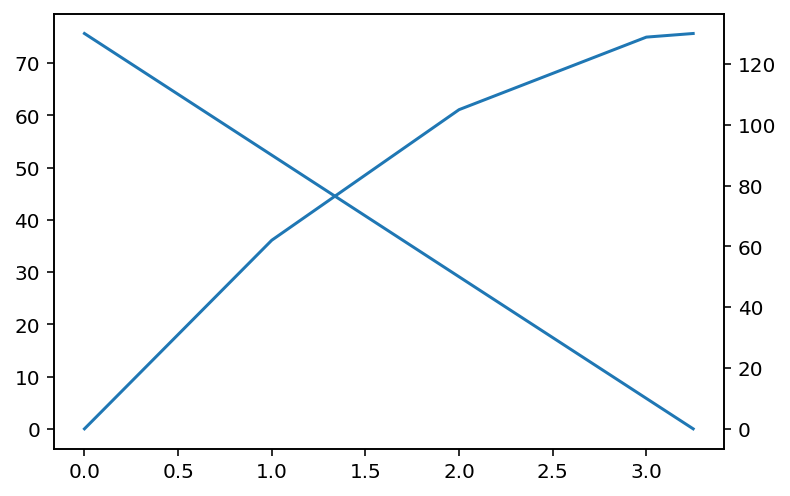

[0, 36.11111111111111, 61.11111111111111, 75.0, 75.69444444444444]

In [27]:
import matplotlib.pyplot as plt

def freinage(vinit, deceleration):
    t = 0
    distance = 0
    vitesse = vinit
    
    temps = [0]
    distances = [0]
    vitesses = [vinit]
    
    while vitesse > 0:
        portion = min(deceleration, vitesse) / deceleration
        
        distance += vitesse * portion / 3600 * 1000
        vitesse -= deceleration * portion
        t += portion
        
        temps.append(t)
        distances.append(distance)
        vitesses.append(vitesse)
        
    return distances, vitesses, temps


distances, vitesses, temps = freinage(130, 40)

fig, ax1 = plt.subplots()
ax1.plot(temps, distances)

ax2 = ax1.twinx()
ax2.plot(temps, vitesses)

plt.show()
distances